In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
X_features = pd.read_csv('df_cleaned.csv')
y_target = pd.read_csv('y_target.csv')

In [3]:
X = X_features.drop('Unnamed: 0', axis=1)
y = y_target.is_fraud

In [4]:
anomaly_inputs = ['hourly_basis', 'Age', 'category', 'amount_qt',
       'merchant', 'job', 'transaction_id']

In [5]:
from sklearn.ensemble import IsolationForest

model_IF = IsolationForest( bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)
#X_train = np.array(X_features.values)
model_IF.fit(X)

IsolationForest(contamination=0.05, n_jobs=-1, random_state=123)

In [6]:
X['anomaly_scores'] = model_IF.decision_function(X[anomaly_inputs])
X['anomaly']= model_IF.predict(X[anomaly_inputs])

In [7]:
X.to_csv('X_IForest_trainingDataset.csv')

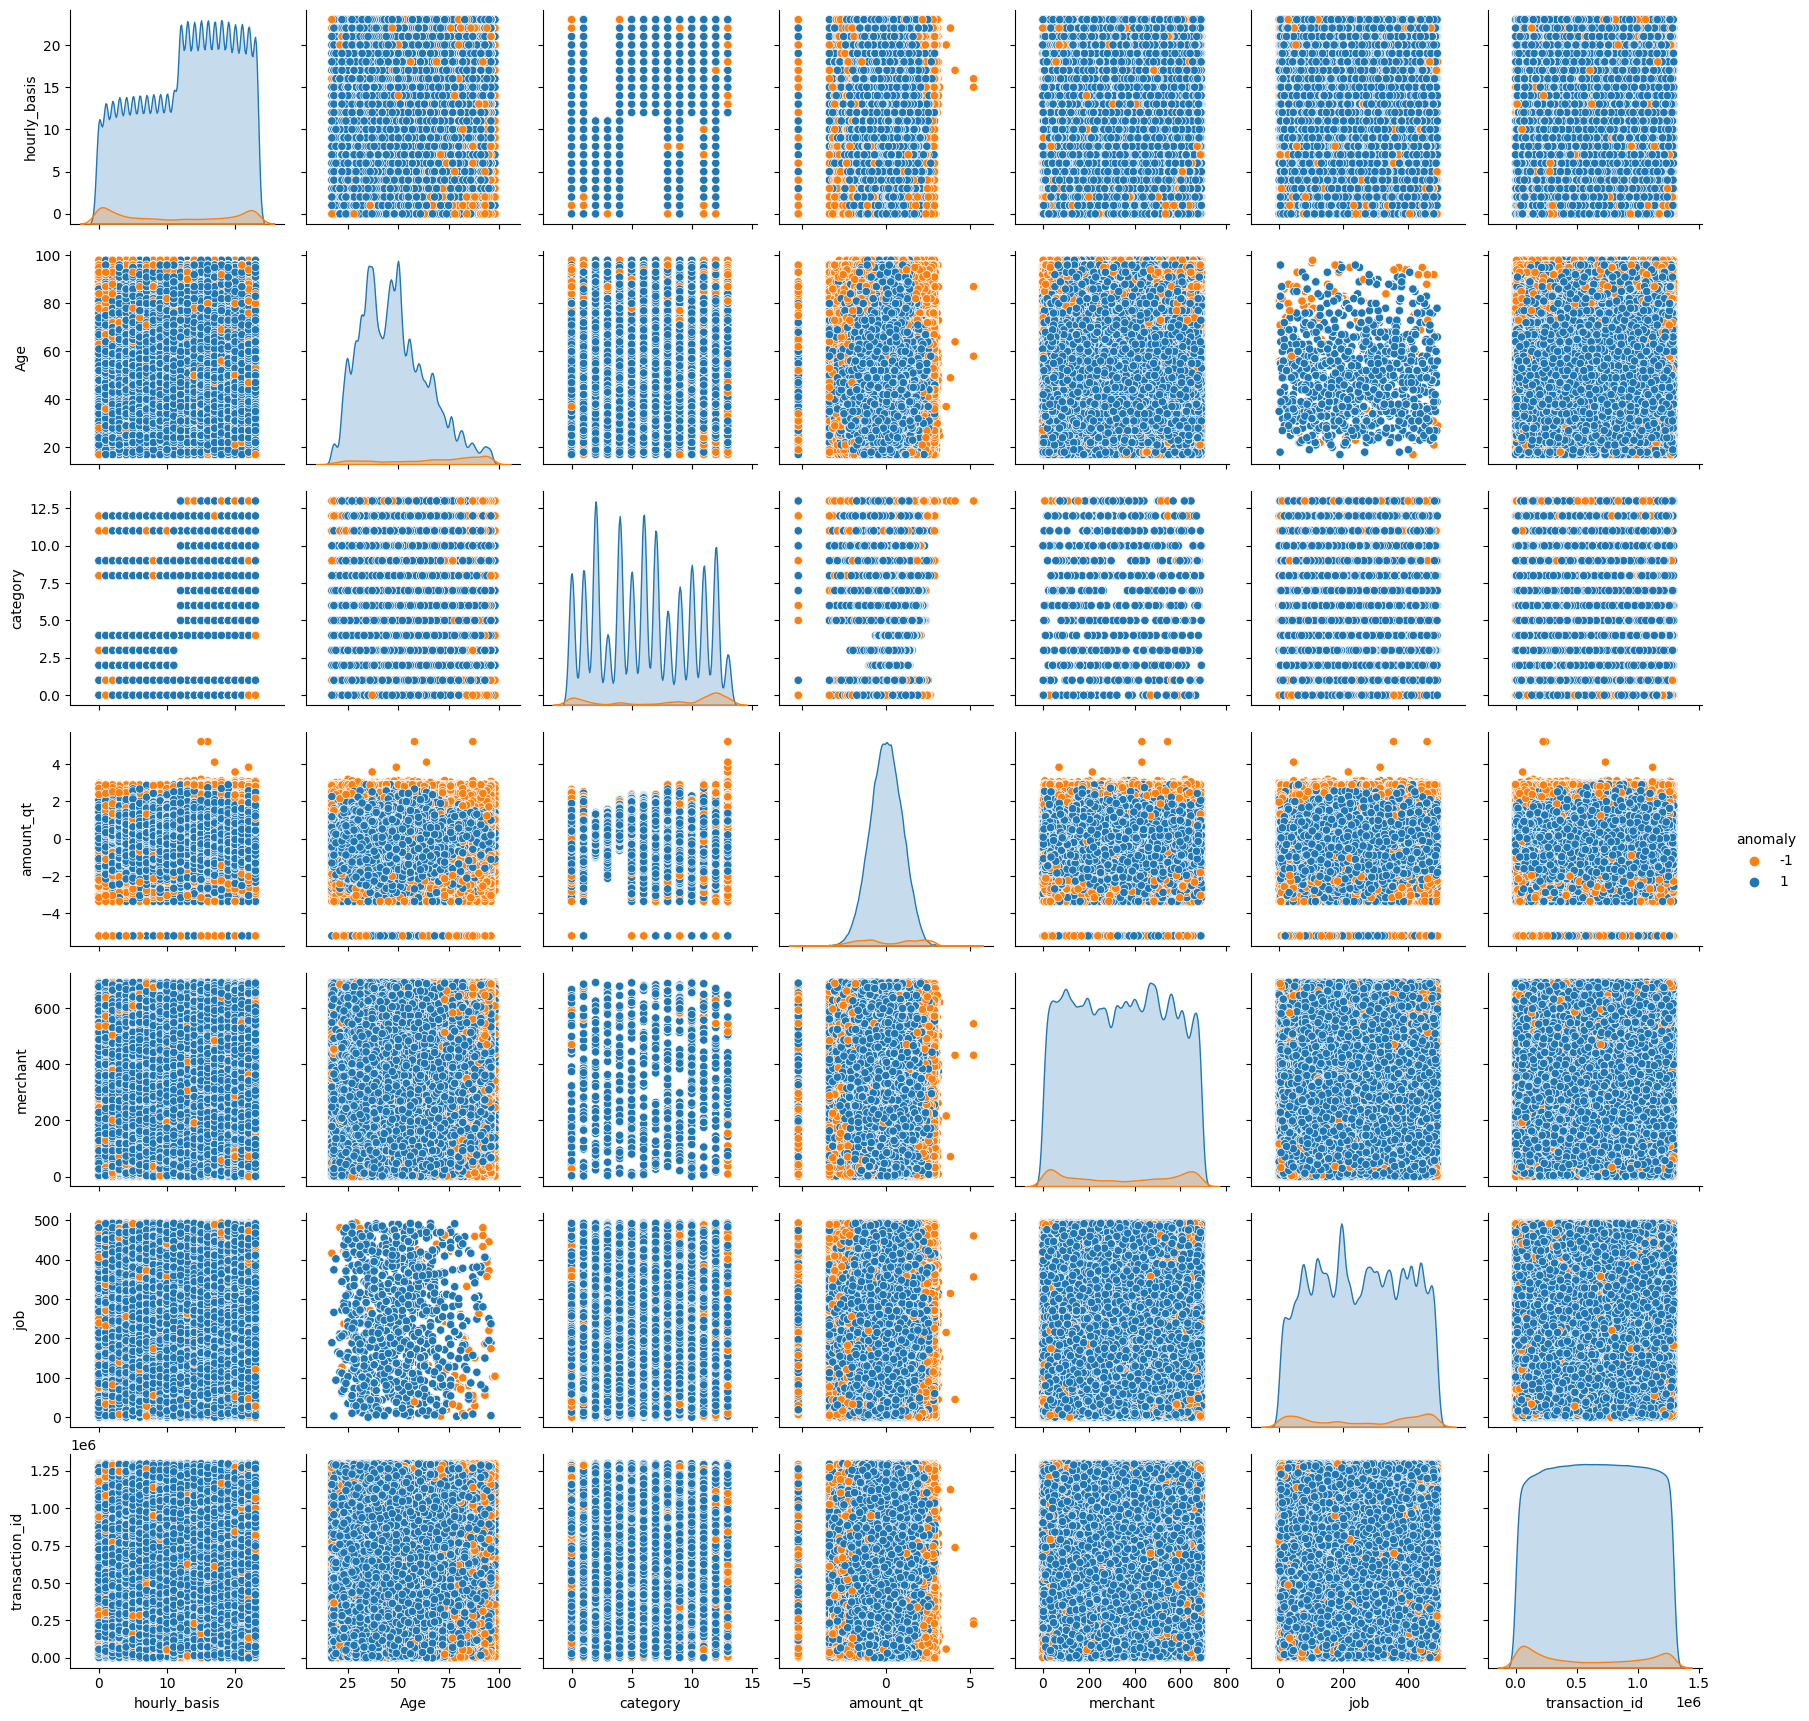

In [8]:
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(X, vars=anomaly_inputs, hue='anomaly', palette=palette)

**Interpretation:**

-1 indicates the outliers(fraudulent transactions) wherelse 1 = inliers(non-fraudulent transactions

In [9]:
#Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions

X.anomaly[X.anomaly == 1] = 0
X.anomaly[X.anomaly == -1] = 1
n_errors = (X.anomaly!= y).sum()

In [10]:
X[['anomaly', 'anomaly_scores']]

anomaly  anomaly_scores
0              0        0.017156
1              0        0.036822
2              0        0.006192
3              0        0.072623
4              0        0.055487
...          ...             ...
1296670        0        0.061548
1296671        0        0.065763
1296672        0        0.065018
1296673        0        0.050857
1296674        0        0.047379

[1296675 rows x 2 columns]

Text(0.5, 23.52222222222222, 'Predicted label')

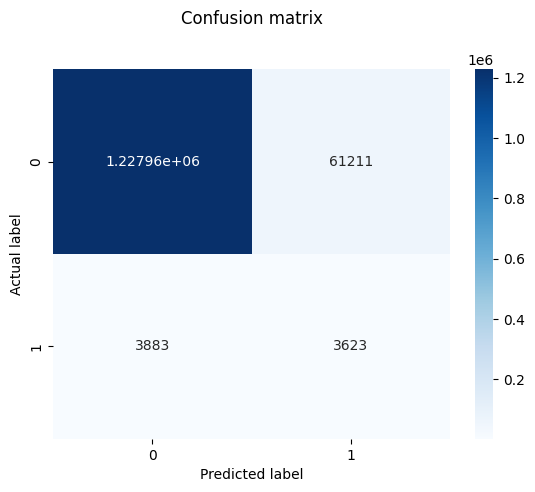

In [11]:
from sklearn import metrics
cf_matrix = metrics.confusion_matrix(y, X.anomaly)
p = sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [12]:
from sklearn.metrics import classification_report,f1_score

# Run Classification Metrics
print("{} : {}".format(IsolationForest ,n_errors))
print("F1 Score :")
print(f1_score(y, X.anomaly, average='weighted'))
print("Classification Report :")
print(classification_report(y,X.anomaly))

<class 'sklearn.ensemble._iforest.IsolationForest'> : 65094
F1 Score :
0.9691200365067031
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1289169
           1       0.06      0.48      0.10      7506

    accuracy                           0.95   1296675
   macro avg       0.53      0.72      0.54   1296675
weighted avg       0.99      0.95      0.97   1296675



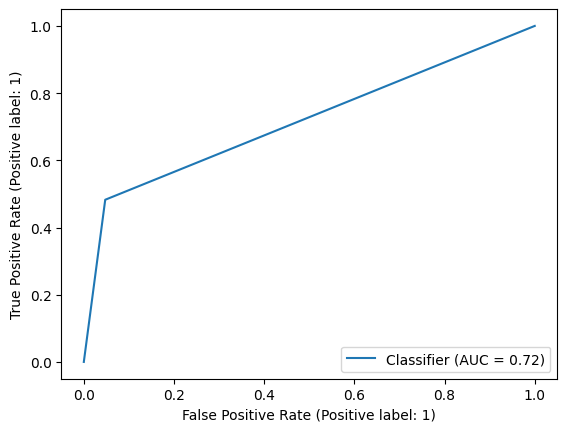

In [13]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y, X.anomaly)
plt.show()

**Different algorithms can be further explored but I have presented the basic idea of anomaly detection which is a part of my fraud payment detection model.**

In [14]:
df_test = pd.read_csv('dftest_cleaned.csv')
df_test.drop('Unnamed: 0', axis=1)
X_test = df_test[['hourly_basis', 'Age', 'category', 'amount_qt', 'merchant', 'job','transaction_id']]
y_test = df_test.is_fraud

In [15]:
np.round(df_test['is_fraud'].value_counts()/len(df_test['is_fraud']) *100,2)

0    99.61
1     0.39
Name: is_fraud, dtype: float64

In [16]:
model_IF = IsolationForest( bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)

model_IF.fit(X_test)
X_test['anomaly_scores'] = model_IF.decision_function(X_test[anomaly_inputs])
X_test['anomaly']= model_IF.predict(X_test[anomaly_inputs])
X_test.to_csv('X_test_IForest_testDataset.csv')

In [17]:
X_test[['anomaly', 'anomaly_scores']]

anomaly  anomaly_scores
0             1        0.084571
1             1        0.087944
2             1        0.103419
3             1        0.092937
4             1        0.047194
...         ...             ...
555714        1        0.052367
555715        1        0.055555
555716        1        0.096609
555717       -1       -0.006658
555718        1        0.029206

[555719 rows x 2 columns]

In [18]:
X_test.anomaly[X_test.anomaly == 1] = 0
X_test.anomaly[X_test.anomaly == -1] = 1
n_errors = (X_test.anomaly!= y_test).sum()

In [19]:
X_test[['anomaly', 'anomaly_scores']]

anomaly  anomaly_scores
0             0        0.084571
1             0        0.087944
2             0        0.103419
3             0        0.092937
4             0        0.047194
...         ...             ...
555714        0        0.052367
555715        0        0.055555
555716        0        0.096609
555717        1       -0.006658
555718        0        0.029206

[555719 rows x 2 columns]

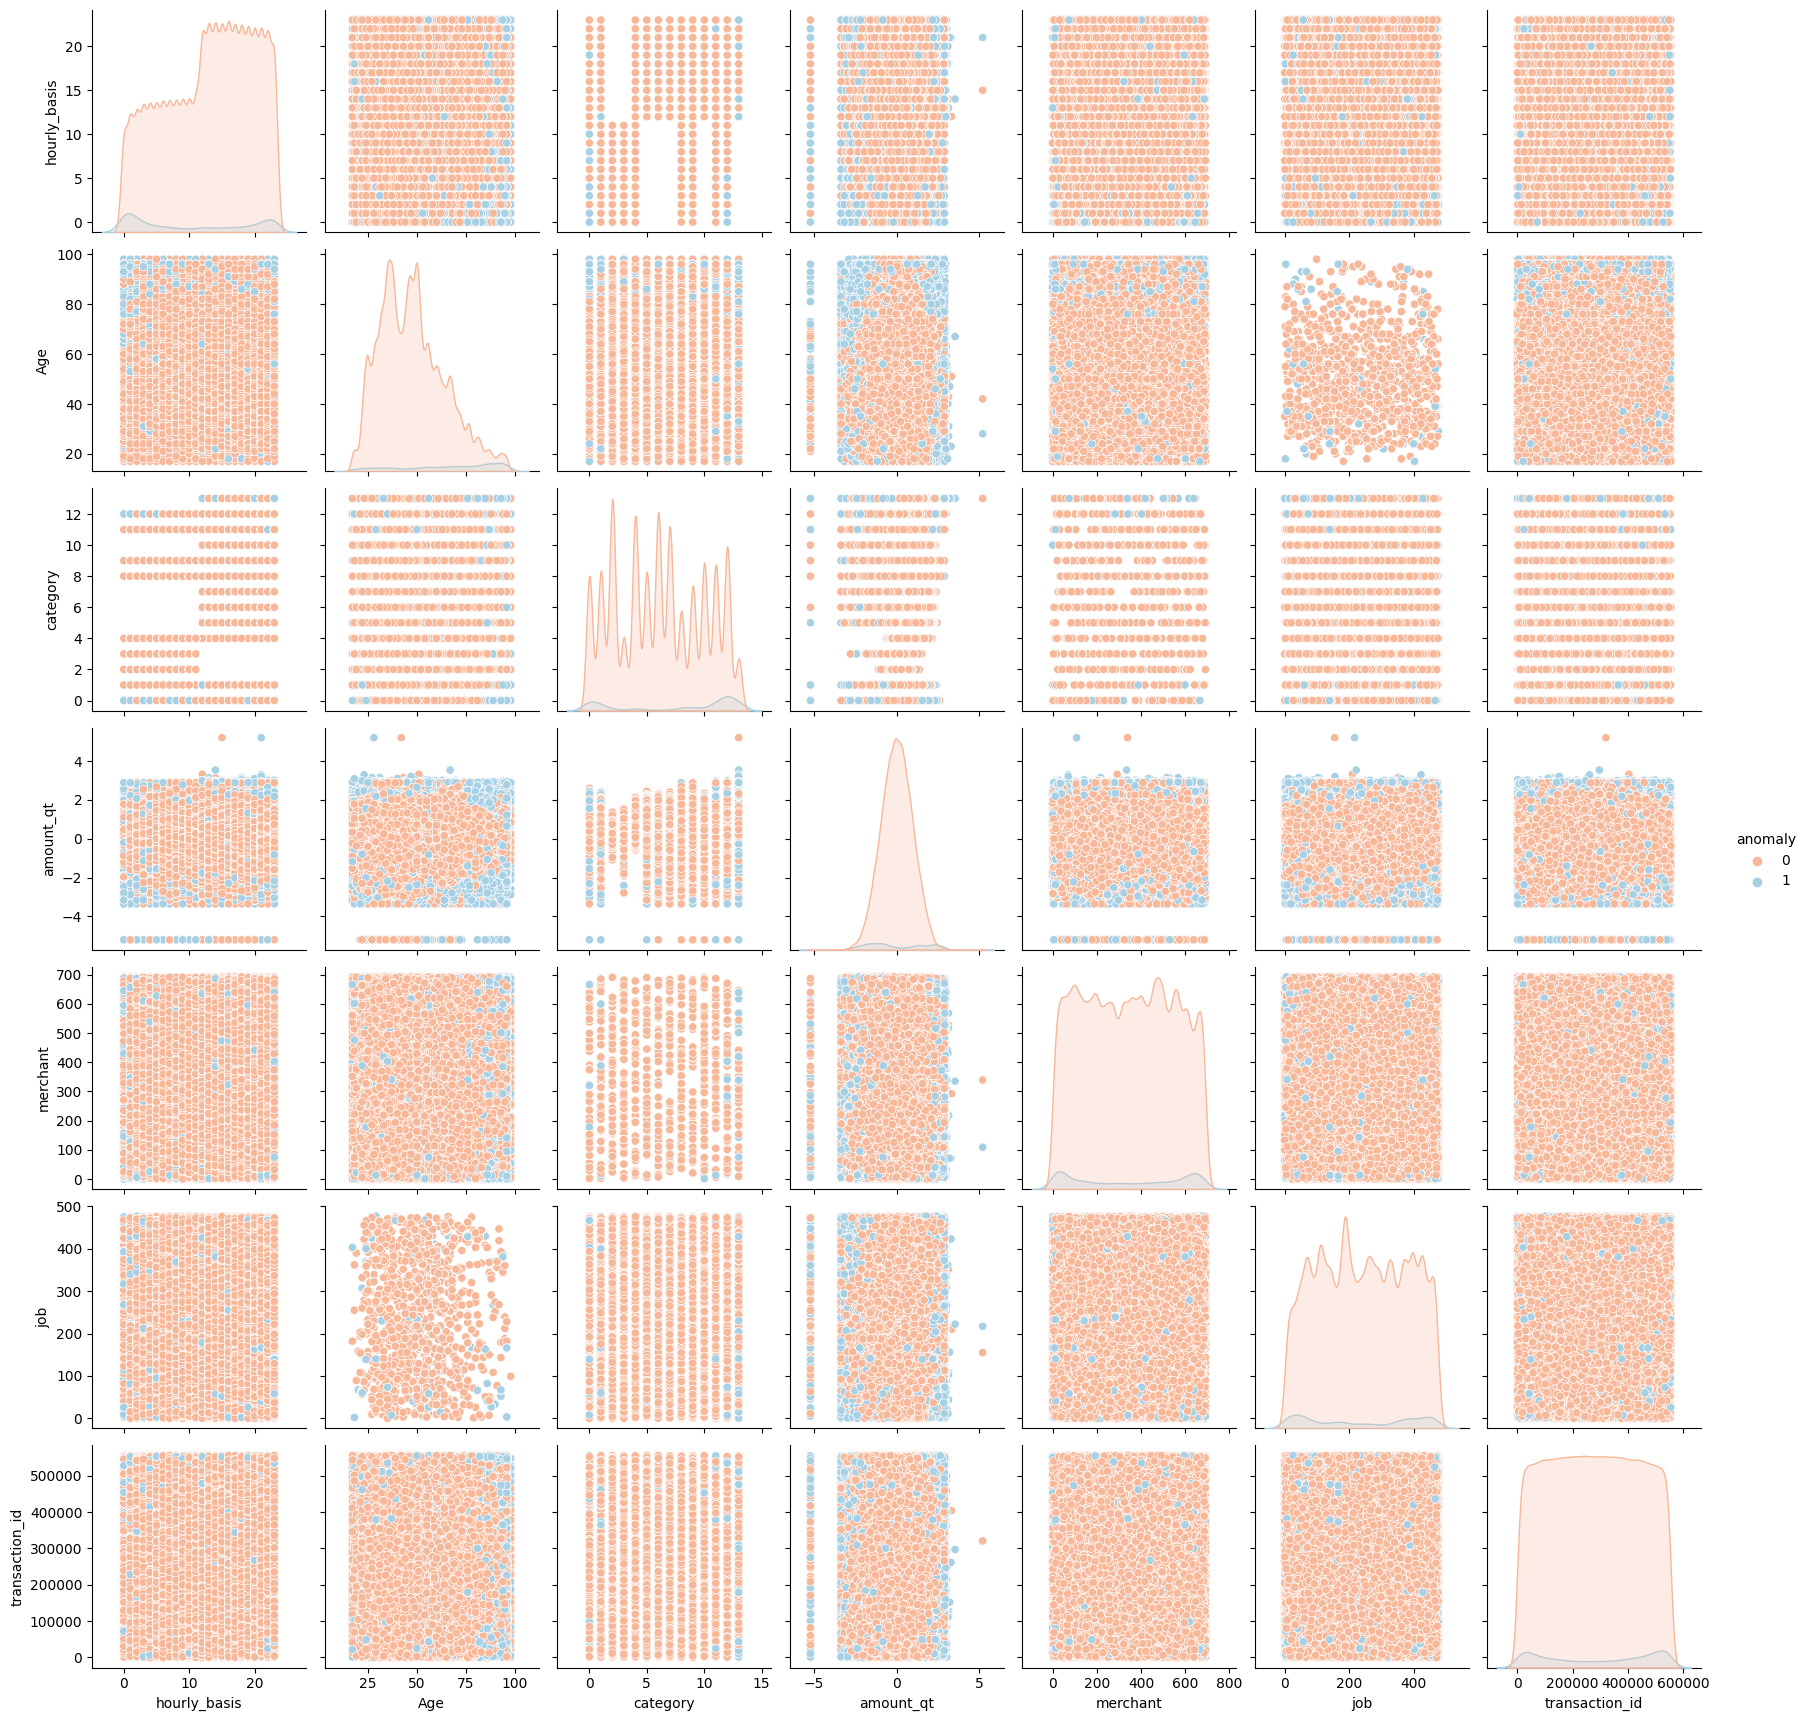

In [20]:
sns.pairplot(X_test, vars=anomaly_inputs, hue='anomaly', palette="RdBu")

In [21]:
from sklearn.metrics import classification_report,f1_score

# Run Classification Metrics
print("{} : {}".format(IsolationForest ,n_errors))
print("F1 Score :")
print(f1_score(y_test, X_test.anomaly, average='weighted'))
print("Classification Report :")
print(classification_report(y_test,X_test.anomaly))

<class 'sklearn.ensemble._iforest.IsolationForest'> : 28169
F1 Score :
0.9704218316662871
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    553574
           1       0.03      0.41      0.06      2145

    accuracy                           0.95    555719
   macro avg       0.51      0.68      0.52    555719
weighted avg       0.99      0.95      0.97    555719



Text(0.5, 23.52222222222222, 'Predicted label')

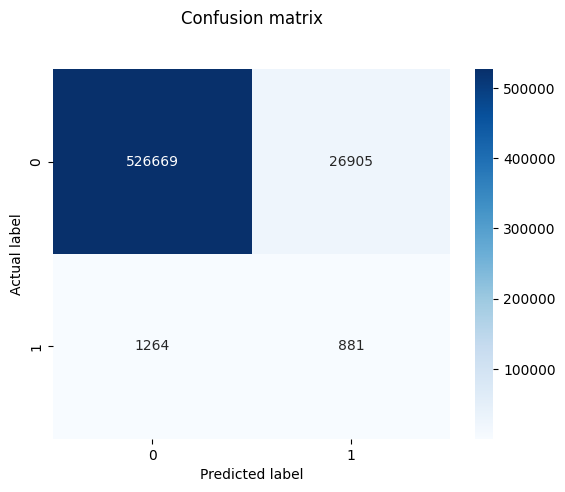

In [22]:
from sklearn import metrics
cf_matrix = metrics.confusion_matrix(y_test, X_test.anomaly)
p = sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

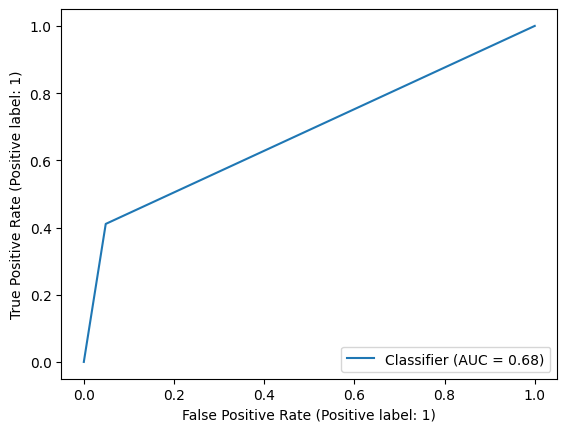

In [23]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, X_test.anomaly)
plt.show()